In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os
%matplotlib inline

In [3]:
# Cell 2: Đọc dữ liệu từ file CSV
# Sử dụng đường dẫn tương đối
df = pd.read_csv('../Data/USA_Housing.csv')

In [4]:
# Cell 3: Hiển thị 5 dòng đầu của dữ liệu
print("5 dòng đầu của dataset:")
print(df.head())
print("\n" + "="*50 + "\n")

5 dòng đầu của dataset:
   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathl

In [5]:
# Cell 4: Thông tin tổng quát về dữ liệu
print("Thông tin tổng quát dataset:")
print(df.info())
print("\n" + "="*50 + "\n")

Thông tin tổng quát dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB
None




In [6]:
# Cell 5: Mô tả thống kê dữ liệu
print("Mô tả thống kê:")
print(df.describe())
print("\n" + "="*50 + "\n")

Mô tả thống kê:
       Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000

Heatmap tương quan:


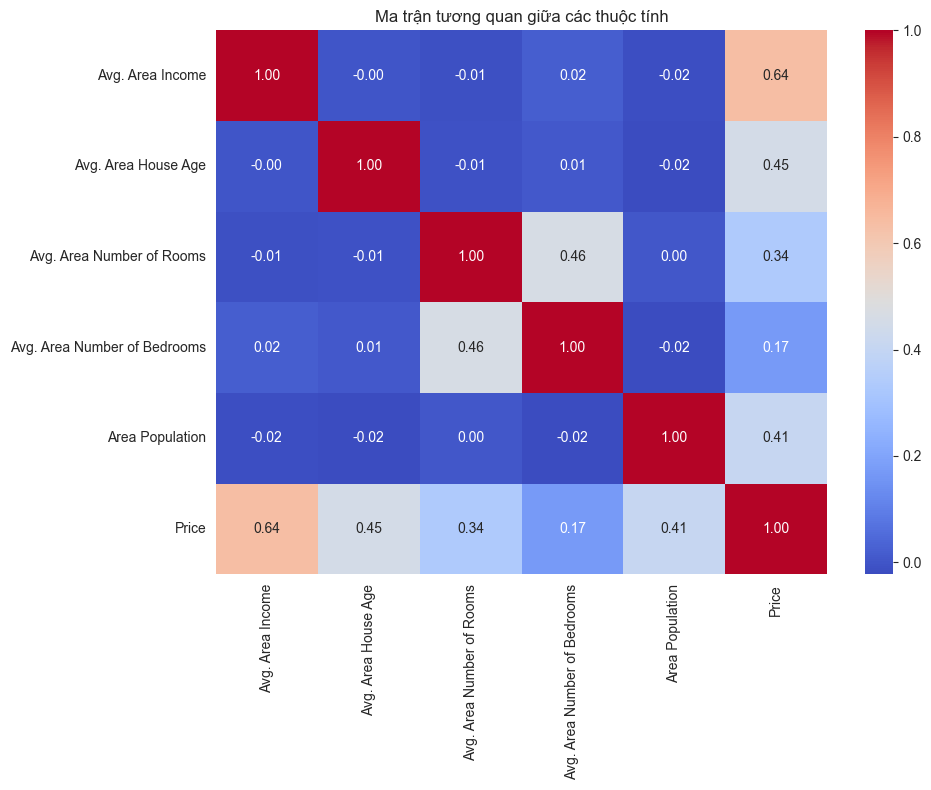


Tương quan với cột Price:
Price                           1.000000
Avg. Area Income                0.639734
Avg. Area House Age             0.452543
Area Population                 0.408556
Avg. Area Number of Rooms       0.335664
Avg. Area Number of Bedrooms    0.171071
Name: Price, dtype: float64


In [21]:
# Cell 6: Kiểm tra độ tương quan giữa các cột dữ liệu
print("Heatmap tương quan:")
plt.figure(figsize=(10, 8))

# Chỉ chọn các cột số để tính correlation, loại bỏ cột 'Address'
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Ma trận tương quan giữa các thuộc tính')
plt.tight_layout()
plt.show()

# Hiển thị correlation với cột Price
print("\nTương quan với cột Price:")
price_corr = numeric_df.corr()['Price'].sort_values(ascending=False)
print(price_corr)

Phân phối giá nhà:


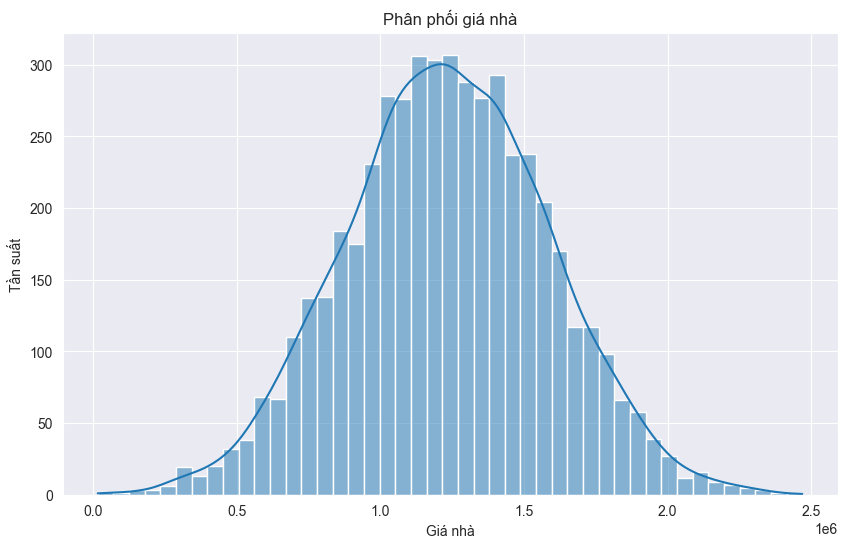

In [8]:
# Cell 7: Phân tích phân phối của giá nhà
print("Phân phối giá nhà:")
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True)
plt.title('Phân phối giá nhà')
plt.xlabel('Giá nhà')
plt.ylabel('Tần suất')
plt.show()

In [9]:
# Cell 8: Tách features và target
print("Tách features và target...")
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
        'Avg. Area Number of Bedrooms', 'Area Population']]
y = df['Price']

print(f"Kích thước X: {X.shape}")
print(f"Kích thước y: {y.shape}")


Tách features và target...
Kích thước X: (5000, 5)
Kích thước y: (5000,)


In [10]:
# Cell 9: Chia dữ liệu thành train và test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

print(f"Kích thước tập train: {X_train.shape}")
print(f"Kích thước tập test: {X_test.shape}")

Kích thước tập train: (4000, 5)
Kích thước tập test: (1000, 5)


In [11]:
# Cell 10: Tạo và train mô hình hồi quy tuyến tính
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

print("Mô hình đã được training thành công!")

Mô hình đã được training thành công!


In [12]:
# Cell 11: Đánh giá hệ số của mô hình
print("\nHệ số của mô hình:")
print(f"Intercept: {lm.intercept_:.2f}")

coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print("\nCoefficients:")
print(coeff_df)


Hệ số của mô hình:
Intercept: -2640441.40

Coefficients:
                                Coefficient
Avg. Area Income                  21.566696
Avg. Area House Age           165453.042478
Avg. Area Number of Rooms     120499.839093
Avg. Area Number of Bedrooms    1999.785336
Area Population                   15.340604


In [13]:
# Cell 12: Dự đoán trên tập test
predictions = lm.predict(X_test)
print("Đã thực hiện dự đoán trên tập test!")

Đã thực hiện dự đoán trên tập test!


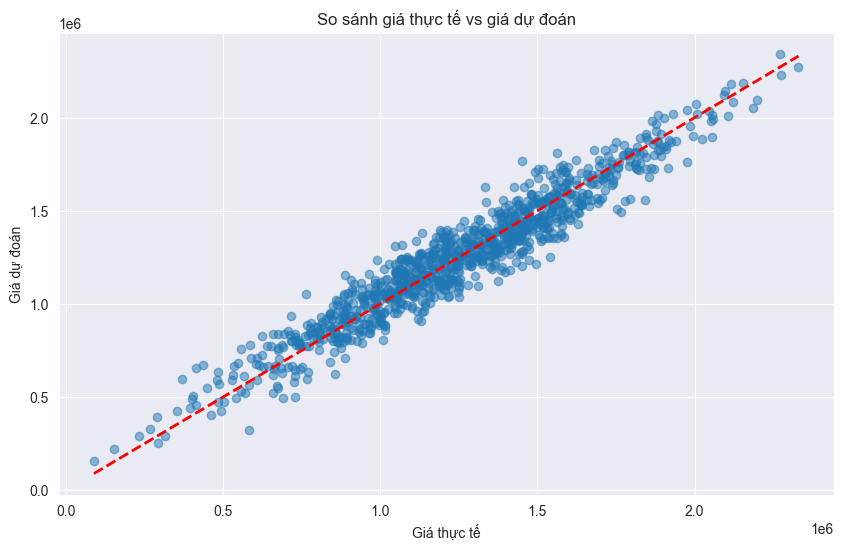

In [14]:
# Cell 13: Trực quan hóa kết quả dự đoán vs thực tế
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5)
plt.xlabel('Giá thực tế')
plt.ylabel('Giá dự đoán')
plt.title('So sánh giá thực tế vs giá dự đoán')
# Đường thẳng lý tưởng (dự đoán = thực tế)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()

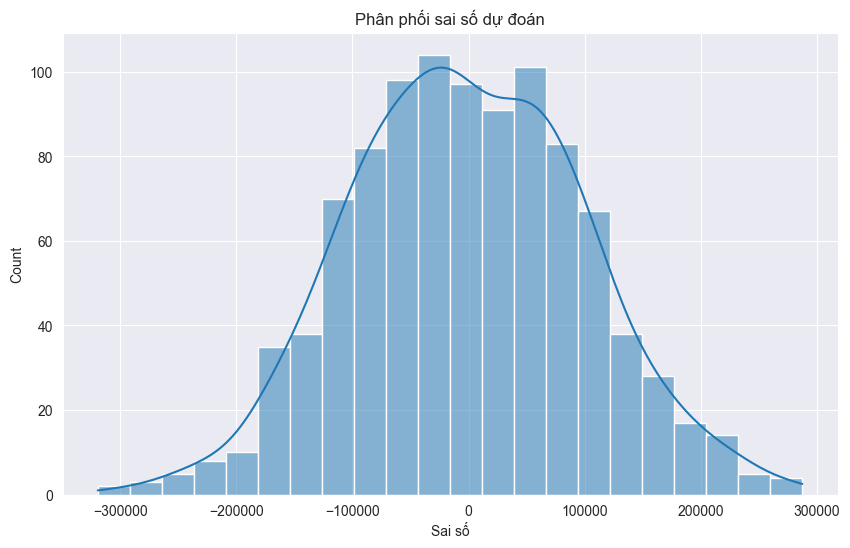

In [15]:
# Cell 14: Phân phối sai số
plt.figure(figsize=(10, 6))
sns.histplot((y_test - predictions), kde=True)
plt.title('Phân phối sai số dự đoán')
plt.xlabel('Sai số')
plt.show()

In [16]:
# Cell 15: Đánh giá mô hình bằng các metrics
from sklearn import metrics

print("ĐÁNH GIÁ MÔ HÌNH:")
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R² Score:', metrics.r2_score(y_test, predictions))


ĐÁNH GIÁ MÔ HÌNH:
MAE: 81305.23300085647
MSE: 10100187858.864885
RMSE: 100499.69083964829
R² Score: 0.9211719165402232


In [17]:
# Cell 16: Lưu mô hình bằng pickle
model_name = "housing_price_model.pkl"

# Đảm bảo thư mục tồn tại
os.makedirs('../models', exist_ok=True)

# Lưu mô hình
model_path = '../models/' + model_name
with open(model_path, 'wb') as file:
    pickle.dump(lm, file)

print(f"\nMô hình đã được lưu tại: {model_path}")


Mô hình đã được lưu tại: ../models/housing_price_model.pkl


In [19]:
# Cell 17: Demo sử dụng mô hình đã lưu
print("\nDEMO SỬ DỤNG MÔ HÌNH ĐÃ LƯU:")

# Load mô hình đã lưu
with open(model_path, 'rb') as file:
    loaded_model = pickle.load(file)

# Dự đoán với dữ liệu mẫu từ tập test
sample_data = X_test.iloc[0:1]  # Lấy mẫu đầu tiên
sample_prediction = loaded_model.predict(sample_data)

print(f"Dữ liệu mẫu: {sample_data.values[0]}")
print(f"Giá dự đoán: {sample_prediction[0]:.2f}")
print(f"Giá thực tế: {y_test.iloc[0]:.2f}")


DEMO SỬ DỤNG MÔ HÌNH ĐÃ LƯU:
Dữ liệu mẫu: [6.67749958e+04 5.71714320e+00 7.79521482e+00 4.32000000e+00
 3.67889803e+04]
Giá dự đoán: 1257919.73
Giá thực tế: 1251688.62


In [24]:
# Cell 18: Demo dự đoán với dữ liệu mới
print("\nDEMO DỰ ĐOÁN VỚI DỮ LIỆU MỚI:")
new_data = [[66774.995817, 5.717143, 7.795215, 4.320000, 36788.980327]]
new_prediction = loaded_model.predict(new_data)
print(f"Dữ liệu đầu vào: {new_data[0]}")
print(f"Giá nhà dự đoán: {new_prediction[0]:.2f}")


DEMO DỰ ĐOÁN VỚI DỮ LIỆU MỚI:
Dữ liệu đầu vào: [66774.995817, 5.717143, 7.795215, 4.32, 36788.980327]
Giá nhà dự đoán: 1257919.72


D:\ML\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
# Cell 19: Hiển thị thông tin quan trọng
print("\n" + "="*60)
print("THÔNG TIN QUAN TRỌNG:")
print(f"- File model đã lưu: {model_path}")
print(f"- Các features sử dụng: {list(X.columns)}")
print(f"- Chỉ số R² trên tập test: {metrics.r2_score(y_test, predictions):.4f}")
print("="*60)


THÔNG TIN QUAN TRỌNG:
- File model đã lưu: ../models/housing_price_model.pkl
- Các features sử dụng: ['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']
- Chỉ số R² trên tập test: 0.9212
